# Business Context and problem statement

In [45]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [46]:
# Lets load the data
past_data=pd.read_csv('INNHotelsGroup_pastdata.csv')
new_data=pd.read_csv('INNHotelsGroup_newdata.csv')

In [47]:
past_data.head(3)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN


In [48]:
new_data.head(3)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_128127,4,Online,1,103.0,1,0,2022-07-01,1,1,Not Canceled
1,INNHG_128128,147,Online,2,103.7,2,2,2022-07-01,0,2,Not Canceled
2,INNHG_128129,43,Online,1,126.9,2,1,2022-07-01,1,2,Not Canceled


## Let's understand exactly how many bookings were cancelled and rebooked in last minute from Jan-2021 to June-2022

In [49]:
# Let's first see how many bookings were cancelled last minute
past_data['booking_status'].value_counts(normalize=True)

booking_status
Not Canceled    0.673089
Canceled        0.326911
Name: proportion, dtype: float64

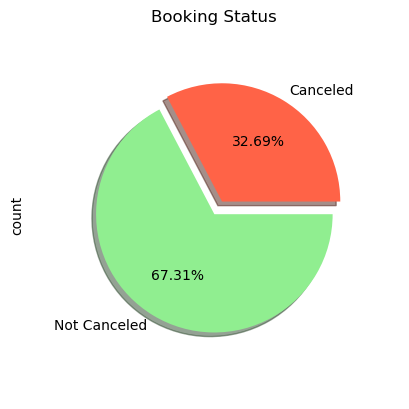

In [50]:
past_data['booking_status'].value_counts().plot(kind='pie',colors=['lightgreen','tomato'],
                                                autopct='%.2f%%',counterclock=False,explode=[0,0.1],shadow=True,radius=0.8)
plt.title('Booking Status')
plt.show()

In [51]:
# Lets see out of cancelled bookings how many were rebooked
past_data[past_data['booking_status']=='Canceled']['rebooked'].value_counts(normalize=True)

rebooked
No     0.800723
Yes    0.199277
Name: proportion, dtype: float64

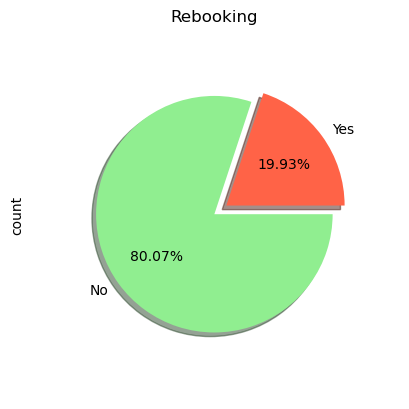

In [52]:
past_data[past_data['booking_status']=='Canceled']['rebooked'].value_counts().plot(kind='pie',colors=['lightgreen','tomato'],
                                                autopct='%.2f%%',counterclock=False,explode=[0,0.1],shadow=True,radius=0.8)
plt.title('Rebooking')
plt.show()

In [53]:
# We can remove rebooked column from data as this information will not be available before hand.

In [54]:
past_data.drop(columns='rebooked',inplace=True)

In [55]:
past_data.head(3)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled


In [56]:
# We can also make booking id as index columns/or remove as these are just unique identifiers of booking.

In [57]:
past_data.set_index('booking_id',inplace=True)

In [58]:
new_data.set_index('booking_id',inplace=True)

### Explore the data

In [59]:
#number of rows and columns in data
print('No. of Rows',past_data.shape[0])
print('No. of columns',past_data.shape[1])

No. of Rows 27093
No. of columns 10


In [60]:
# check the balance of target variable
past_data['booking_status'].value_counts()

booking_status
Not Canceled    18236
Canceled         8857
Name: count, dtype: int64

In [61]:
# 5 point summary
past_data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,27093.0,81.605249,84.901428,0.0,14.0,55.0,118.0,443.0
no_of_special_requests,27093.0,0.556454,0.743715,0.0,0.0,0.0,1.0,5.0
avg_price_per_room,27093.0,101.025910,34.557289,0.0,79.0,97.0,119.0,540.0
no_of_adults,27093.0,1.825822,0.512182,0.0,2.0,2.0,2.0,4.0
no_of_weekend_nights,27093.0,0.778319,0.861787,0.0,0.0,1.0,1.0,6.0
required_car_parking_space,27093.0,0.028864,0.167426,0.0,0.0,0.0,0.0,1.0
no_of_week_nights,27093.0,2.171373,1.386023,0.0,1.0,2.0,3.0,17.0


In [62]:
# Explore the columns one by one
num_cols=['lead_time','avg_price_per_room','no_of_week_nights']
cat_cols=['market_segment_type', 'no_of_special_requests','no_of_adults', 'no_of_weekend_nights','required_car_parking_space','booking_status']

### Univariate Analysis

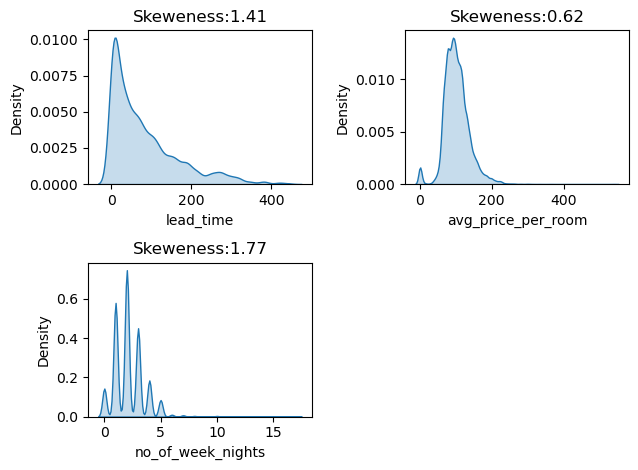

In [63]:
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    plt.title(f'Skeweness:{round(past_data[i].skew(),2)}')
    sns.kdeplot(data=past_data,x=i,fill=True)
    t+=1
plt.tight_layout()
plt.show()

In [64]:
past_data[past_data['avg_price_per_room']==0]    # this seems a bit fishy

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
booking_id,,,,,,,,,,
INNHG_101089,9,Online,2,0.0,2,1,2021-01-01,0,0,Not Canceled
INNHG_101119,24,Online,1,0.0,2,1,2021-01-01,0,0,Not Canceled
INNHG_101140,145,Online,1,0.0,2,0,2021-01-05,0,0,Not Canceled
INNHG_101150,4,Online,1,0.0,1,0,2021-01-05,0,1,Not Canceled
INNHG_101179,145,Online,1,0.0,2,0,2021-01-05,0,0,Not Canceled
...,...,...,...,...,...,...,...,...,...,...
INNHG_127432,3,Online,0,0.0,2,0,2022-06-24,0,0,Not Canceled
INNHG_127463,0,Online,0,0.0,1,0,2022-06-24,0,2,Not Canceled
INNHG_127773,3,Online,0,0.0,1,1,2022-06-27,0,0,Not Canceled


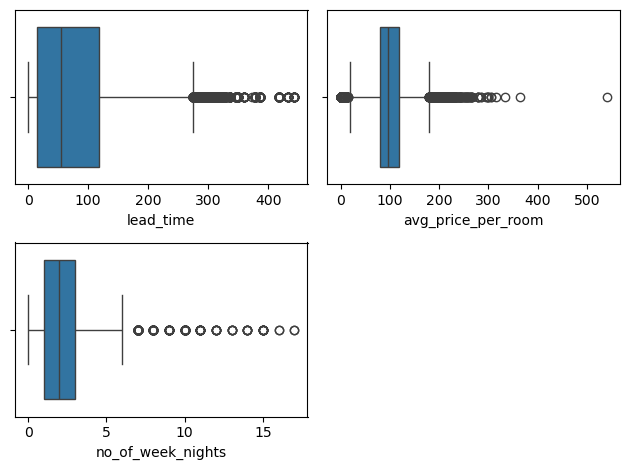

In [65]:
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=past_data,x=i,fill=True)
    t+=1
plt.tight_layout()
plt.show()

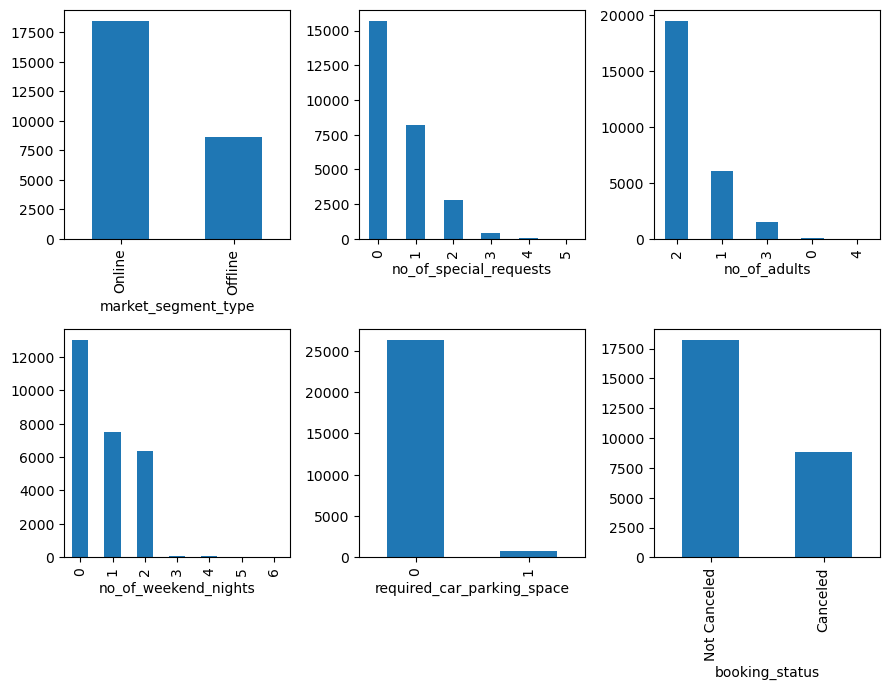

In [66]:
plt.figure(figsize=(9,7))
t=1
for i in cat_cols:
    plt.subplot(2,3,t)
    past_data[i].value_counts().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

### Bivariate Analysis

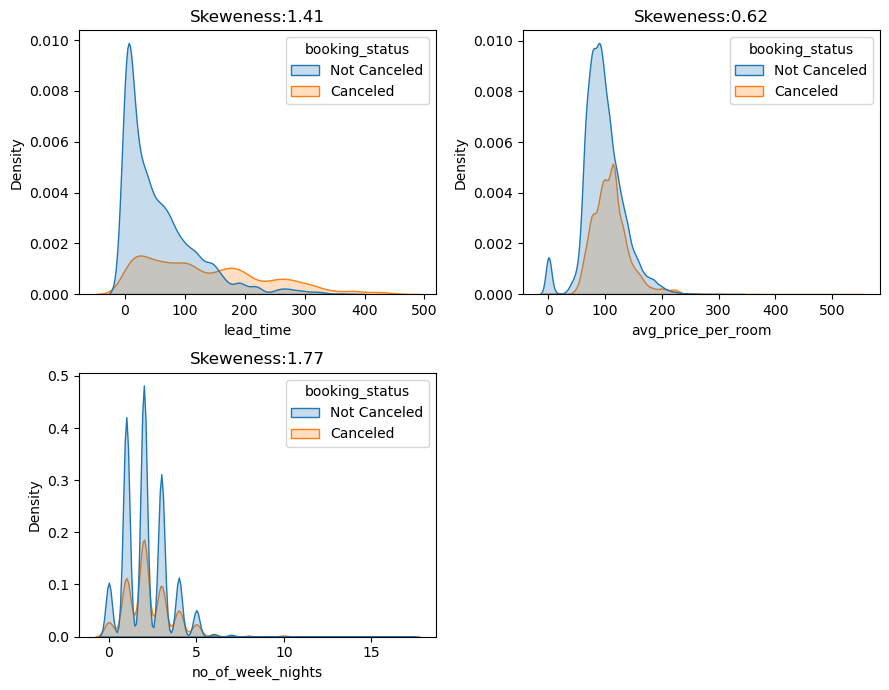

In [67]:
plt.figure(figsize=(9,7))
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    plt.title(f'Skeweness:{round(past_data[i].skew(),2)}')
    sns.kdeplot(data=past_data,x=i,fill=True,hue='booking_status')
    t+=1
plt.tight_layout()
plt.show()

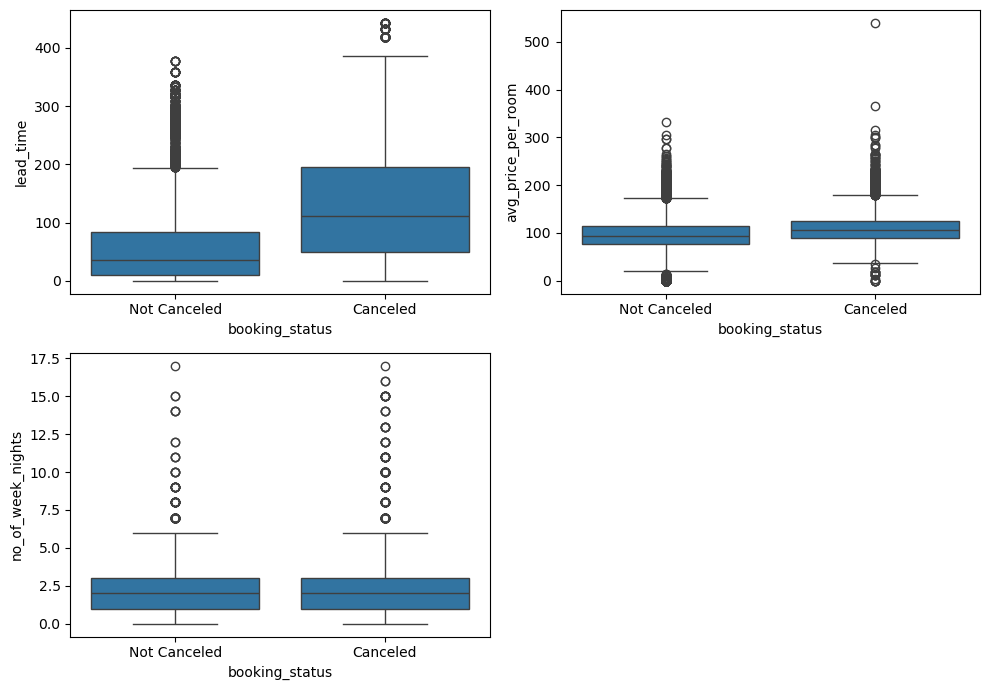

In [68]:
plt.figure(figsize=(10,7))
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=past_data,x='booking_status',y=i,fill=True)
    t+=1
plt.tight_layout()
plt.show()

In [69]:
# Lets investigate lead_time and avg_price_per_room with booking status.
past_data.groupby(by='booking_status')['lead_time'].mean()

booking_status
Canceled        134.035791
Not Canceled     56.140382
Name: lead_time, dtype: float64

In [70]:
samp1 = past_data[past_data['booking_status']=='Canceled']['lead_time']
samp2 = past_data[past_data['booking_status']=='Not Canceled']['lead_time']

In [71]:
# We will go with 2 sample t-test

In [72]:
#Assumption 1 : data must be normal
print(stats.shapiro(samp1))
print(stats.shapiro(samp2))

#Assumption 2 :  Variances are equal
print(stats.levene(samp1,samp2))

## data is not normal and variances are also not equal.

ShapiroResult(statistic=0.9387743609879114, pvalue=4.865435517353332e-51)
ShapiroResult(statistic=0.8214888949700189, pvalue=7.235137959871973e-88)
LeveneResult(statistic=3210.120590252021, pvalue=0.0)


In [73]:
# lets go with non-parametric test - Mannwhitneyu test
pvalue=stats.mannwhitneyu(samp1,samp2,alternative='greater')[1]
if pvalue < 0.05:
    print('Reject H0')
else:
    print('fail to reject H0')

# hence we can conclude that avg leadtime of cancelled bookings are greater than not cancelled booking (in 95% cases)  

Reject H0


In [74]:
past_data.groupby(by='booking_status')['avg_price_per_room'].mean()

booking_status
Canceled        109.722152
Not Canceled     96.802253
Name: avg_price_per_room, dtype: float64

In [75]:
samp1_ = past_data[past_data['booking_status']=='Canceled']['avg_price_per_room']
samp2_ = past_data[past_data['booking_status']=='Not Canceled']['avg_price_per_room']

In [76]:
#Assumption 1 : data must be normal
print(stats.shapiro(samp1_))
print(stats.shapiro(samp2_))

#Assumption 2 :  Variances are equal
print(stats.levene(samp1_,samp2_))

## data is not normal and variances are also not equal.

ShapiroResult(statistic=0.9253871055438694, pvalue=1.5094155400796404e-54)
ShapiroResult(statistic=0.9534249109201302, pvalue=3.2212372568679052e-59)
LeveneResult(statistic=29.227364523829735, pvalue=6.490728476679038e-08)


In [77]:
# lets go with non-parametric test - Mannwhitneyu test
pvalue=stats.mannwhitneyu(samp1_,samp2_,alternative='greater')[1]
if pvalue < 0.05:
    print('Reject H0')
else:
    print('fail to reject H0')

# hence we can conclude that price of cancelled bookings are greater than not cancelled booking (in 95% cases)  

Reject H0


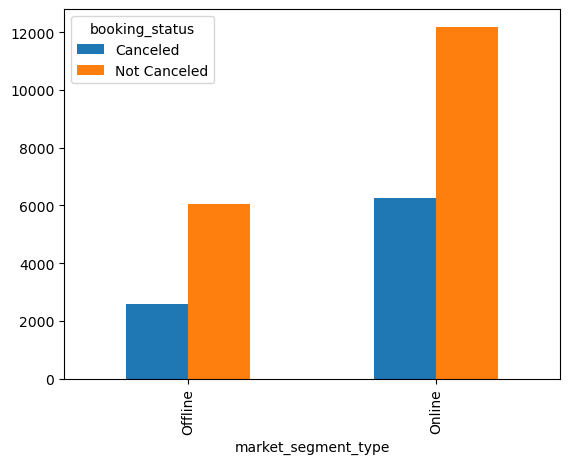

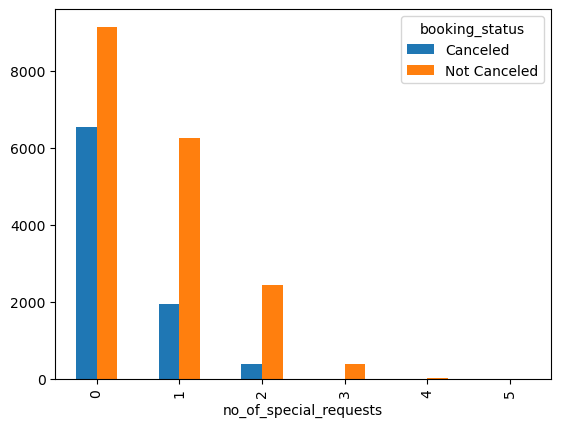

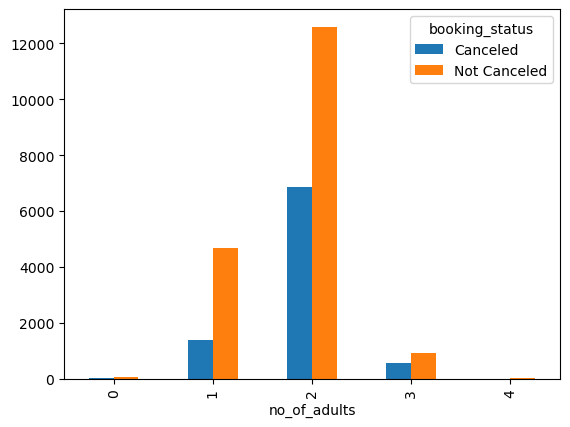

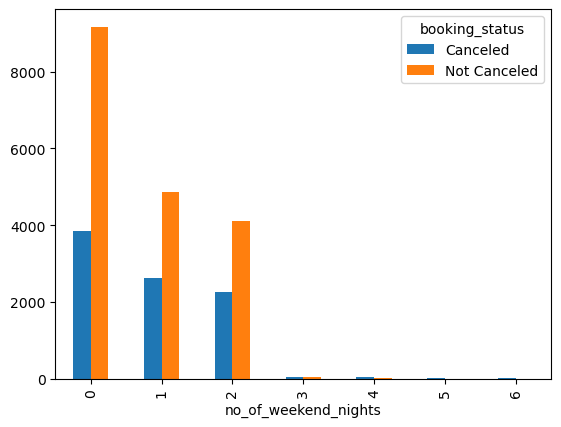

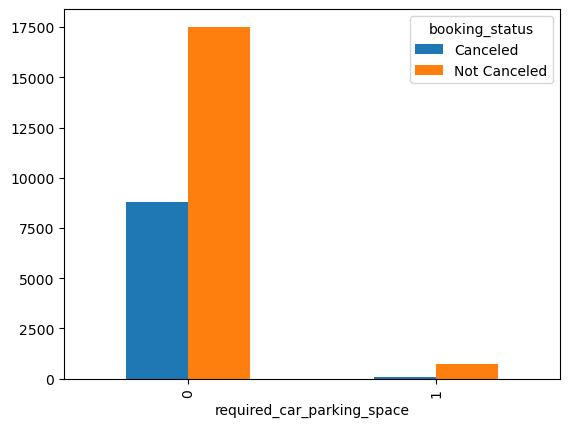

In [78]:
# Cat columns vc target variables

for i in cat_cols:
    if i != 'booking_status':
        pd.crosstab(past_data[i],past_data['booking_status']).plot(kind='bar')
        plt.show()

In [79]:
# Lets do Chi-square contingency(for independence) test to make final conclusions
# H0 : columns are independent
# H1 : columns are dependent

for i in cat_cols:
    if i != 'booking_status':
        contingency_table = pd.crosstab(past_data[i],past_data['booking_status'])
        print(i,'  :  ',stats.chi2_contingency(contingency_table)[1])

# we reject the H0 as pvalue is less than 0.05

market_segment_type   :   7.806389643886697e-11
no_of_special_requests   :   0.0
no_of_adults   :   1.4411855115006094e-73
no_of_weekend_nights   :   5.324997086476798e-43
required_car_parking_space   :   5.626905783478662e-49


In [80]:
## effect on taget columns is shown by below given
# no_of_special_requests > no. of adults > car_parking_space > no.of_adults > ..

#### Just for reference 

In [81]:
# Inferential Statistics (Num vs Num)

past_data['lead_time'].corr(past_data['avg_price_per_room'])

-0.02928918726851987

In [82]:
# Parametric test (Person's Correlation test)
#assumption - data must be normal

# H0 - no correlation
# H1 - there is some correlation

stats.pearsonr(past_data['lead_time'],past_data['avg_price_per_room'])

PearsonRResult(statistic=-0.02928918726851989, pvalue=1.4227003552821461e-06)

In [83]:
# Parametric test (Spearman's Correlation test)
# when data is not normal like in our case

# H0 - no correlation
# H1 - there is some correlation

stats.spearmanr(past_data['lead_time'],past_data['avg_price_per_room'])

SignificanceResult(statistic=0.00683549727618094, pvalue=0.26055481328066965)

In [84]:
# As pvalues > 0.05 hence we fail to reject the H0 

### Data Preprocessing

In [85]:
# lets check for missing missing values
print(past_data.isnull().sum().sum())
print(past_data.isnull().sum().sum())

0
0


In [86]:
# check for duplicates
x_train.duplicated().sum()     # but we can't remove as they all have unique id's for each row, so will assume there are no duplicates

8539

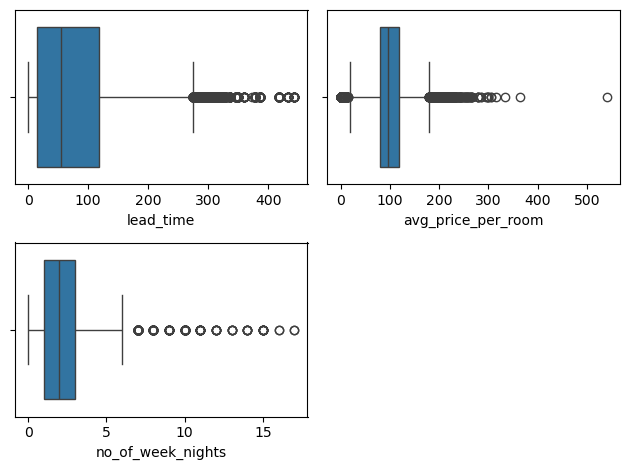

In [87]:
# checking for outliers
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=past_data,x=i,fill=True)
    t+=1
plt.tight_layout()
plt.show()


In [88]:
## lets not lets treat only the extreme outlier for avg_price column
past_data[past_data['avg_price_per_room']>400]

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
booking_id,,,,,,,,,,
INNHG_119173,35,Offline,0,540.0,2,0,2022-03-25,0,1,Canceled


In [89]:
past_data.drop(index='INNHG_119173',inplace=True)

In [90]:
# lets split the data into train and test before we do any transformation

x_train = past_data.drop(columns=['booking_status'])
y_train = past_data['booking_status'].map({'Not Canceled':0,'Canceled':1})

x_test = new_data.drop(columns=['booking_status'])
y_test = new_data['booking_status'].map({'Not Canceled':0,'Canceled':1})

In [91]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(27092, 9) (27092,) (3583, 9) (3583,)


### Feature Encoding

In [92]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27092 entries, INNHG_101034 to INNHG_128126
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lead_time                   27092 non-null  int64  
 1   market_segment_type         27092 non-null  object 
 2   no_of_special_requests      27092 non-null  int64  
 3   avg_price_per_room          27092 non-null  float64
 4   no_of_adults                27092 non-null  int64  
 5   no_of_weekend_nights        27092 non-null  int64  
 6   arrival_date                27092 non-null  object 
 7   required_car_parking_space  27092 non-null  int64  
 8   no_of_week_nights           27092 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 2.1+ MB


In [93]:
x_train['market_segment_type'].value_counts()

market_segment_type
Online     18456
Offline     8636
Name: count, dtype: int64

In [94]:
x_train['market_segment_type']=x_train['market_segment_type'].map({'Online':1,'Offline':0})

In [95]:
x_test['market_segment_type']=x_test['market_segment_type'].map({'Online':1,'Offline':0})

In [96]:
x_train['market_segment_type'].value_counts()

market_segment_type
1    18456
0     8636
Name: count, dtype: int64

In [97]:
x_train['arrival_date']=pd.to_datetime(x_train['arrival_date'])
x_test['arrival_date']=pd.to_datetime(x_test['arrival_date'])

In [98]:
x_train['arrival_date'].dt.month    # we can use dt. functiom to extract anything from date

booking_id
INNHG_101034    1
INNHG_101035    1
INNHG_101036    1
INNHG_101037    1
INNHG_101038    1
               ..
INNHG_128122    6
INNHG_128123    6
INNHG_128124    6
INNHG_128125    6
INNHG_128126    6
Name: arrival_date, Length: 27092, dtype: int32

In [99]:
x_train['arrival_day']=x_train['arrival_date'].dt.day
x_train['arrival_weekday']=x_train['arrival_date'].dt.weekday 
x_train['arrival_month']=x_train['arrival_date'].dt.month 

In [100]:
x_test['arrival_day']=x_test['arrival_date'].dt.day
x_test['arrival_weekday']=x_test['arrival_date'].dt.weekday 
x_test['arrival_month']=x_test['arrival_date'].dt.month 

In [101]:
x_train.drop(columns='arrival_date',inplace=True)
x_test.drop(columns='arrival_date',inplace=True)

In [102]:
x_train.head(5)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_day,arrival_weekday,arrival_month
booking_id,,,,,,,,,,,
INNHG_101034,0,1,0,85.03,1,1,0,0,1,4,1
INNHG_101035,34,1,2,125.10,2,2,0,0,1,4,1
INNHG_101036,24,1,1,71.69,2,2,0,0,1,4,1
INNHG_101037,23,1,0,84.70,1,2,0,0,1,4,1
INNHG_101038,46,1,1,149.40,2,2,0,3,1,4,1


In [103]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27092 entries, INNHG_101034 to INNHG_128126
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lead_time                   27092 non-null  int64  
 1   market_segment_type         27092 non-null  int64  
 2   no_of_special_requests      27092 non-null  int64  
 3   avg_price_per_room          27092 non-null  float64
 4   no_of_adults                27092 non-null  int64  
 5   no_of_weekend_nights        27092 non-null  int64  
 6   required_car_parking_space  27092 non-null  int64  
 7   no_of_week_nights           27092 non-null  int64  
 8   arrival_day                 27092 non-null  int32  
 9   arrival_weekday             27092 non-null  int32  
 10  arrival_month               27092 non-null  int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 3.2+ MB


## Feature Transformation

In [229]:
# lets use Yeo-Jhonson transformation on numeric columns
# this way the model will fit better and effect of outliers will also reduce 

pt=PowerTransformer(standardize=False)

In [230]:
x_train[['lead_time','avg_price_per_room']]=pt.fit_transform(x_train[['lead_time','avg_price_per_room']])
x_test[['lead_time','avg_price_per_room']]=pt.fit_transform(x_test[['lead_time','avg_price_per_room']])

In [231]:
x_train.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_day,arrival_weekday,arrival_month
booking_id,,,,,,,,,,,
INNHG_101034,0.000000,1,0,55.92895,1,1,0,0,1,4,1
INNHG_101035,5.198971,1,2,78.72459,2,2,0,0,1,4,1


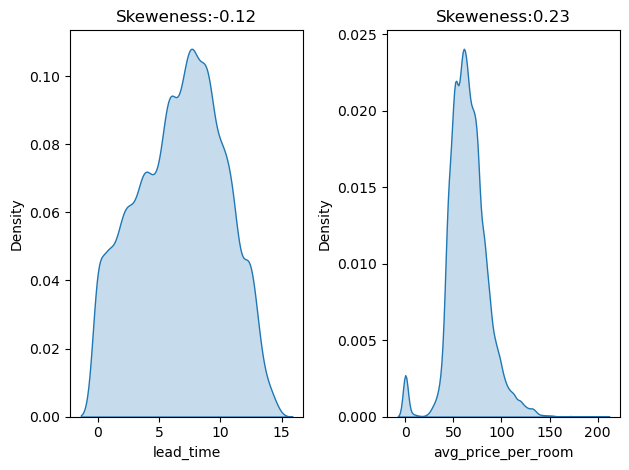

In [107]:
t=1
for i in ['lead_time','avg_price_per_room']:
    plt.subplot(1,2,t)
    plt.title(f'Skeweness:{round(x_train[i].skew(),2)}')
    sns.kdeplot(data=x_train,x=i,fill=True)
    t+=1
plt.tight_layout()
plt.show()

## Modelling

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
                                                    ,VotingClassifier,StackingClassifier)
from xgboost import XGBClassifier
from sklearn.metrics import (cohen_kappa_score,accuracy_score,classification_report,roc_auc_score,
                                roc_curve,precision_score,confusion_matrix,f1_score,recall_score)
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import KFold

In [109]:
# create a function to validate model
m=[]
acu=[]
rec=[]
pre=[]
f1=[]
kap=[]

def model_validation(model, trainx, trainy, testx, testy):
    mod=model
    mod.fit(trainx, trainy)
    pred_s= mod.predict_proba(testx)[:,1]
    pred_h= mod.predict(testx)     # by default threshold value=0.5
    
    print(confusion_matrix(testy, pred_h))
    print(classification_report(testy, pred_h))
    
    fpr,tpr,thres= roc_curve(testy, pred_s)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='red',ls='--')
    plt.title(f'ROC AUC : {round(roc_auc_score(testy,pred_s),3)}')
    plt.show()
    
    response= input('Do you want to save this model? Y/N')
    
    if response.lower()=='y':
        global scorecard
        m.append(str(model))
        acu.append(accuracy_score(testy,pred_h))
        rec.append(recall_score(testy,pred_h))
        pre.append(precision_score(testy,pred_h))
        f1.append(f1_score(testy,pred_h))
        kap.append(cohen_kappa_score(testy,pred_h))
        
        scorecard= pd.DataFrame({'Model':m, 'Accuracy':acu, 'Recall':rec, 'Precision':pre, 'F1 Score':f1, 'Cohen Kappa':kap})
    
    else:
        return

[[1219 1164]
 [ 127 1073]]
              precision    recall  f1-score   support

           0       0.91      0.51      0.65      2383
           1       0.48      0.89      0.62      1200

    accuracy                           0.64      3583
   macro avg       0.69      0.70      0.64      3583
weighted avg       0.76      0.64      0.64      3583



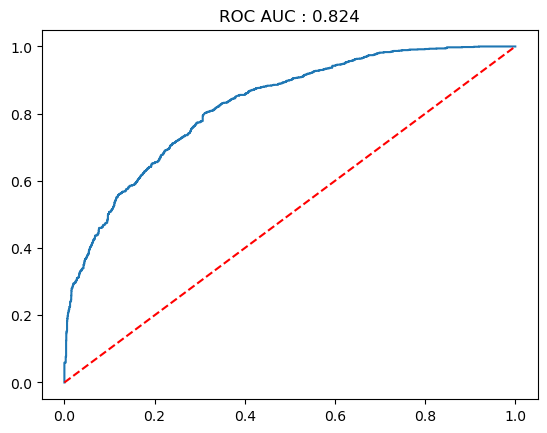

Do you want to save this model? Y/N y


In [110]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

[[1346 1037]
 [ 220  980]]
              precision    recall  f1-score   support

           0       0.86      0.56      0.68      2383
           1       0.49      0.82      0.61      1200

    accuracy                           0.65      3583
   macro avg       0.67      0.69      0.65      3583
weighted avg       0.73      0.65      0.66      3583



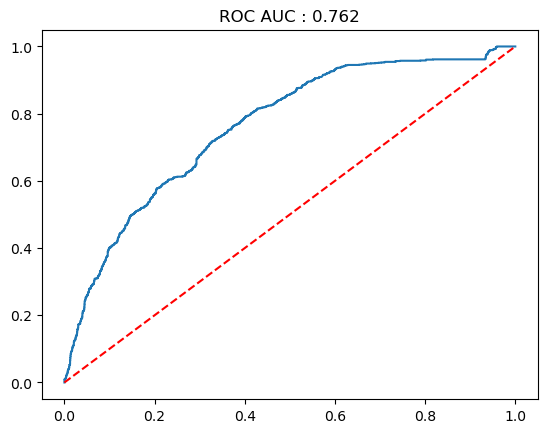

Do you want to save this model? Y/N y


In [111]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

[[1493  890]
 [ 265  935]]
              precision    recall  f1-score   support

           0       0.85      0.63      0.72      2383
           1       0.51      0.78      0.62      1200

    accuracy                           0.68      3583
   macro avg       0.68      0.70      0.67      3583
weighted avg       0.74      0.68      0.69      3583



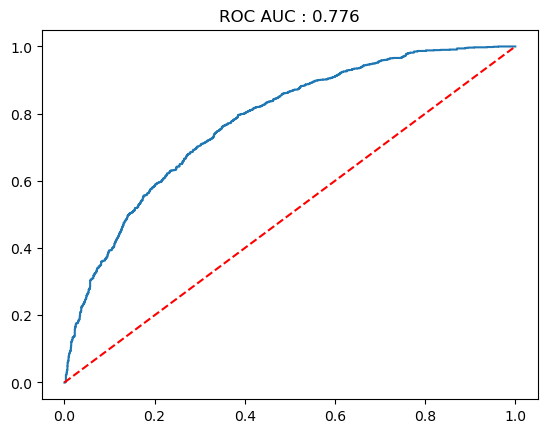

Do you want to save this model? Y/N y


In [112]:
model_validation(MultinomialNB(),x_train,y_train,x_test,y_test)

[[2301   82]
 [1138   62]]
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      2383
           1       0.43      0.05      0.09      1200

    accuracy                           0.66      3583
   macro avg       0.55      0.51      0.44      3583
weighted avg       0.59      0.66      0.56      3583



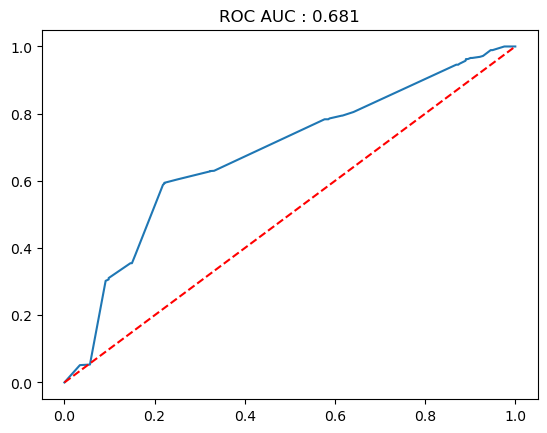

Do you want to save this model? Y/N y


In [113]:
model_validation(BernoulliNB(),x_train,y_train,x_test,y_test)

In [114]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen Kappa
0,LogisticRegression(),0.639687,0.894167,0.479660,0.624382,0.334052
1,GaussianNB(),0.649177,0.816667,0.485870,0.609263,0.326350
2,MultinomialNB(),0.677644,0.779167,0.512329,0.618182,0.359245
3,BernoulliNB(),0.659503,0.051667,0.430556,0.092262,0.022079


[[1451  932]
 [ 237  963]]
              precision    recall  f1-score   support

           0       0.86      0.61      0.71      2383
           1       0.51      0.80      0.62      1200

    accuracy                           0.67      3583
   macro avg       0.68      0.71      0.67      3583
weighted avg       0.74      0.67      0.68      3583



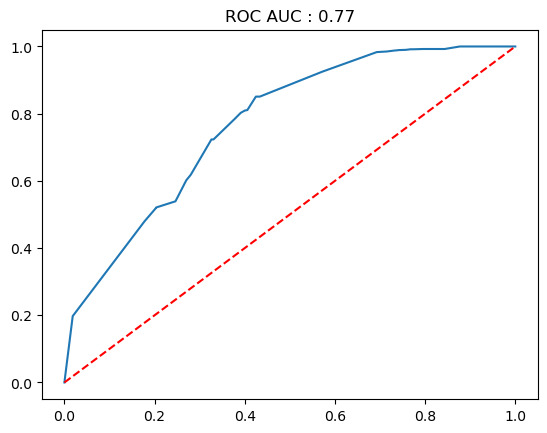

Do you want to save this model? Y/N y


In [115]:
model_validation(DecisionTreeClassifier(max_depth=6,min_samples_split=300),x_train,y_train,x_test,y_test)

In [116]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen Kappa
0,LogisticRegression(),0.639687,0.894167,0.479660,0.624382,0.334052
1,GaussianNB(),0.649177,0.816667,0.485870,0.609263,0.326350
2,MultinomialNB(),0.677644,0.779167,0.512329,0.618182,0.359245
3,BernoulliNB(),0.659503,0.051667,0.430556,0.092262,0.022079
4,"DecisionTreeClassifier(max_depth=6, min_sample...",0.673737,0.802500,0.508179,0.622294,0.359688


In [117]:
# Fine tune DT
grid={'max_depth':[4,5,6,7,11],'min_samples_split':[5,350,300,400]}
gscv=GridSearchCV(estimator=DecisionTreeClassifier(),cv=5,scoring='roc_auc',verbose=1,param_grid=grid)

In [118]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 11],
                         'min_samples_split': [5, 350, 300, 400]},
             scoring='roc_auc', verbose=1)

In [119]:
gscv.best_params_

{'max_depth': 6, 'min_samples_split': 400}

In [120]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen Kappa
0,LogisticRegression(),0.639687,0.894167,0.479660,0.624382,0.334052
1,GaussianNB(),0.649177,0.816667,0.485870,0.609263,0.326350
2,MultinomialNB(),0.677644,0.779167,0.512329,0.618182,0.359245
3,BernoulliNB(),0.659503,0.051667,0.430556,0.092262,0.022079
4,"DecisionTreeClassifier(max_depth=6, min_sample...",0.673737,0.802500,0.508179,0.622294,0.359688


In [121]:
grid={'n_estimators':[250,300,350],'max_depth':[8,10,11]}
gscv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,scoring='roc_auc',cv=4,verbose=1)

In [ ]:
gscv.fit(x_train,y_train)

In [ ]:
gscv.best_params_

[[1582  801]
 [ 259  941]]
              precision    recall  f1-score   support

           0       0.86      0.66      0.75      2383
           1       0.54      0.78      0.64      1200

    accuracy                           0.70      3583
   macro avg       0.70      0.72      0.69      3583
weighted avg       0.75      0.70      0.71      3583



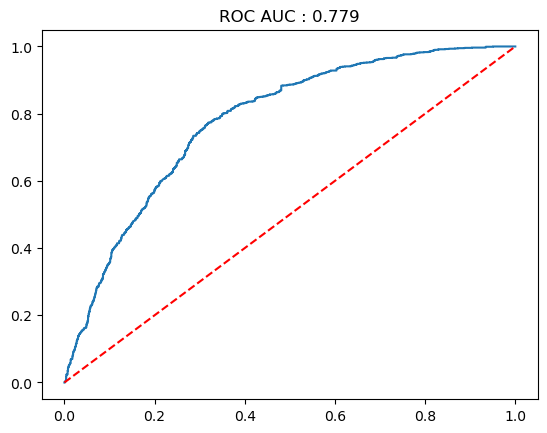

Do you want to save this model? Y/N y


In [123]:
model_validation(RandomForestClassifier(max_depth=10,n_estimators=330),x_train,y_train,x_test,y_test)

In [124]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen Kappa
0,LogisticRegression(),0.639687,0.894167,0.479660,0.624382,0.334052
1,GaussianNB(),0.649177,0.816667,0.485870,0.609263,0.326350
2,MultinomialNB(),0.677644,0.779167,0.512329,0.618182,0.359245
3,BernoulliNB(),0.659503,0.051667,0.430556,0.092262,0.022079
4,"DecisionTreeClassifier(max_depth=6, min_sample...",0.673737,0.802500,0.508179,0.622294,0.359688
5,"RandomForestClassifier(max_depth=10, n_estimat...",0.704159,0.784167,0.540184,0.639701,0.402870


In [131]:
grid={'n_estimators':[40,50,60,70],'max_depth':[2,3,5],'gamma':[5,6,7]}

In [132]:
gscv=GridSearchCV(estimator=XGBClassifier(),param_grid=grid,cv=5,scoring='roc_auc',verbose=1)

In [133]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [5, 6, 7], 'max_depth': [2, 3, 5],
                         'n_estimators': [40, 50, 60, 70]},
             scoring='roc_auc', verbose=1)

In [134]:
gscv.best_params_

{'gamma': 5, 'max_depth': 2, 'n_estimators': 50}

In [135]:
gscv.best_score_

0.7873172525033829

[[1219 1164]
 [ 145 1055]]
              precision    recall  f1-score   support

           0       0.89      0.51      0.65      2383
           1       0.48      0.88      0.62      1200

    accuracy                           0.63      3583
   macro avg       0.68      0.70      0.63      3583
weighted avg       0.75      0.63      0.64      3583



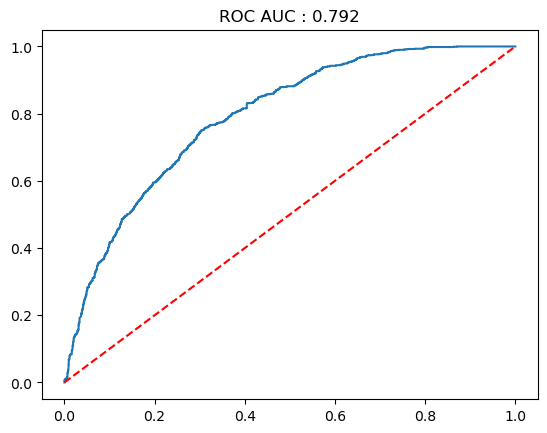

Do you want to save this model? Y/N y


In [171]:
model_validation(XGBClassifier(n_estimators=350,max_depth=7,gamma=1,learning_rate=0.1),x_train,y_train,x_test,y_test)

In [172]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen Kappa
0,LogisticRegression(),0.639687,0.894167,0.479660,0.624382,0.334052
1,GaussianNB(),0.649177,0.816667,0.485870,0.609263,0.326350
2,MultinomialNB(),0.677644,0.779167,0.512329,0.618182,0.359245
3,BernoulliNB(),0.659503,0.051667,0.430556,0.092262,0.022079
4,"DecisionTreeClassifier(max_depth=6, min_sample...",0.673737,0.802500,0.508179,0.622294,0.359688
5,"RandomForestClassifier(max_depth=10, n_estimat...",0.704159,0.784167,0.540184,0.639701,0.402870
6,"XGBClassifier(base_score=None, booster=None, c...",0.634664,0.879167,0.475439,0.617140,0.322691


### Voting

In [196]:
base_model=[('DT1',DecisionTreeClassifier(max_depth=5)),
           ('DT2',DecisionTreeClassifier(max_depth=6)),
           ('XBG1',XGBClassifier(n_estimators=350,learning_rate=0.01,max_depth=7)),
        ('XBG2',XGBClassifier(n_estimators=400,learning_rate=0.05,max_depth=6))]

[[1286 1097]
 [ 160 1040]]
              precision    recall  f1-score   support

           0       0.89      0.54      0.67      2383
           1       0.49      0.87      0.62      1200

    accuracy                           0.65      3583
   macro avg       0.69      0.70      0.65      3583
weighted avg       0.75      0.65      0.66      3583



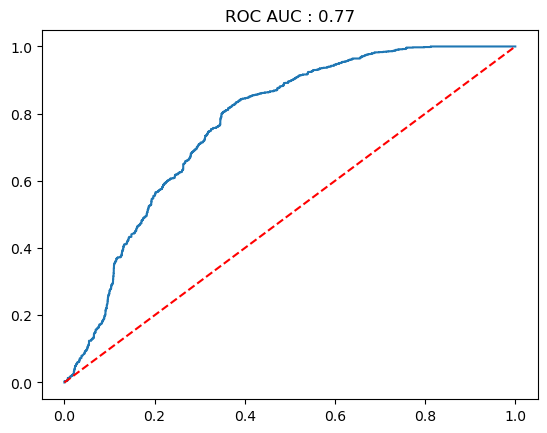

Do you want to save this model? Y/N n


In [197]:
model_validation(VotingClassifier(estimators=base_model,voting='soft'),x_train,y_train,x_test,y_test)

In [198]:
scores=cross_val_score(estimator=VotingClassifier(estimators=base_model,voting='soft'),X=x_train,y=y_train,cv=6,verbose=1,scoring='roc_auc')

In [199]:
scores

array([0.88895096, 0.75516376, 0.46235055, 0.76481263, 0.82520035,
       0.69195379])

In [201]:
scores=cross_val_score(estimator=RandomForestClassifier(max_depth=10,n_estimators=330),X=x_train,y=y_train,cv=6,verbose=1,scoring='roc_auc')

In [202]:
scores

array([0.89067436, 0.71990956, 0.52068012, 0.79078573, 0.83633619,
       0.86392904])

In [204]:
scores=cross_val_score(XGBClassifier(n_estimators=350,max_depth=7,gamma=1,learning_rate=0.1),X=x_train,y=y_train,cv=6,verbose=1,scoring='roc_auc')

In [205]:
scores

array([0.84710266, 0.64550205, 0.46254752, 0.7461006 , 0.71760184,
       0.74866639])

In [206]:
from sklearn.model_selection import KFold

In [210]:
scores=cross_val_score(XGBClassifier(n_estimators=350,max_depth=7,gamma=1,learning_rate=0.1),X=x_train,y=y_train,cv=KFold(n_splits=6,random_state=2,shuffle=True),verbose=1,scoring='f1')

In [211]:
scores

array([0.80669277, 0.80752212, 0.81557522, 0.8148405 , 0.84691442,
       0.79779412])

In [212]:
scores=cross_val_score(estimator=VotingClassifier(estimators=base_model,voting='soft'),X=x_train,y=y_train,cv=KFold(n_splits=6,random_state=2,shuffle=True),verbose=1,scoring='f1')

In [213]:
scores

array([0.78412814, 0.77694611, 0.7818448 , 0.78634284, 0.81212121,
       0.76294896])

In [214]:
scores=cross_val_score(estimator=RandomForestClassifier(max_depth=10,n_estimators=330),X=x_train,y=y_train,cv=KFold(n_splits=6,random_state=2,shuffle=True),verbose=1,scoring='roc_auc')

In [215]:
scores

array([0.93943618, 0.93595846, 0.93791141, 0.93475314, 0.95006218,
       0.9327709 ])

In [217]:
scores=cross_val_score(estimator=RandomForestClassifier(max_depth=10,n_estimators=330),X=x_train,y=y_train,cv=KFold(n_splits=6,random_state=2,shuffle=True),verbose=1,scoring='f1')

In [220]:
scores

array([0.79384841, 0.79031037, 0.79594056, 0.79618509, 0.83040113,
       0.77617602])

In [221]:
scores.mean()

0.7971435966890935

In [222]:
scores.std()/scores.mean()

0.020521502118285895

In [ ]:
scores=cross_val_score(XGBClassifier(n_estimators=350,max_depth=7,gamma=1,learning_rate=0.1),X=x_train,y=y_train,cv=KFold(n_splits=6,random_state=2,shuffle=True),verbose=1,scoring='f1')

### Business Interpretation

In [257]:
imp=pd.DataFrame(final_model.feature_importances_,index=x_train.columns).sort_values(by=0,ascending=False)

<Axes: >

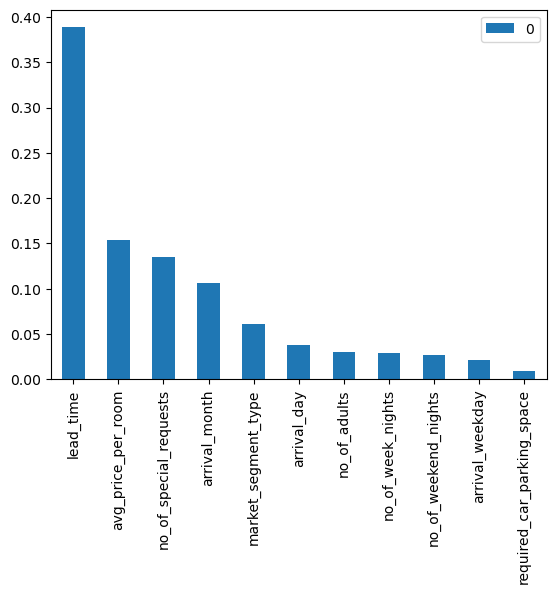

In [258]:
imp.plot(kind='bar')

## Deployment

In [223]:
final_model=RandomForestClassifier(max_depth=10,n_estimators=330)
final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=330)

In [225]:
new_data.head().T

booking_id,INNHG_128127,INNHG_128128,INNHG_128129,INNHG_128130,INNHG_128131
lead_time,4,147,43,145,86
market_segment_type,Online,Online,Online,Offline,Offline
no_of_special_requests,1,2,1,0,1
avg_price_per_room,103.0,103.7,126.9,72.76,107.69
no_of_adults,1,2,2,2,2
no_of_weekend_nights,0,2,1,0,1
arrival_date,2022-07-01,2022-07-01,2022-07-01,2022-07-01,2022-07-01
required_car_parking_space,1,0,1,0,0
no_of_week_nights,1,2,2,1,2
booking_status,Not Canceled,Not Canceled,Not Canceled,Not Canceled,Not Canceled


In [250]:
lt=2
mst=1
spcl=0
price=200
adults=2
weekend=2
parking=0
weekday=0
month=11
day=10
weekd=5

In [251]:
tran_data=pt.transform([[lt,price]])
lt_t=tran_data[0][0]
price_t=tran_data[0][1]

In [252]:
final_model.predict([[lt_t,mst,spcl,price_t,adults,weekend,parking,weekday,month,day,weekd]])

array([1], dtype=int64)

In [253]:
# we got 1 -> means booking will be cancelled

In [241]:
final_model.predict_proba([[lt_t,mst,spcl,price_t,adults,weekend,parking,weekday,month,day,weekd]])[:,1]

array([0.80188389])

In [259]:
## lets sasve the fitted model and transformer instance
import pickle

In [262]:
with open('final_model_rf.pkl','wb') as file:
    pickle.dump(final_model,file)

In [263]:
with open('transformer.pkl','wb') as file:
    pickle.dump(pt,file)